# Multiple, Polynomial, and Multiple Polynomial Linear Regression

Links:
https://www.sjsu.edu/faculty/guangliang.chen/Math261a/Ch3slides-multiple-linear-regression.pdf
http://users.stat.umn.edu/~helwig/notes/mvlr-Notes.pdf
https://web.stanford.edu/class/stats191/markdown/Chapter9/Multiple_Linear_Regression.html
https://www.ma.imperial.ac.uk/~das01/GSACourse/Regression.pdf
https://online.stat.psu.edu/stat501/lesson/9/9.7
https://www.sjsu.edu/faculty/guangliang.chen/Math261a/Ch7slides-polynomial-regression.pdf

For $n$ observations and $p$ predictors, given observations $y_i$ and predictors $x_{ij}$,

$$y_i = \beta_0 + \sum_{j=1}^p\beta_jx_{ij}+\epsilon_i = \beta_0 + \beta_1x_{i1} + \beta_2x_{i2} + ... + \beta_px_{ip} + \epsilon_i$$

where $i=1;...,n$; $j=1,...,p$; $\beta_0$ is the intercept; $\beta_j$ is the coefficient of the $j-th$ predictor; and $\epsilon_i$ is the error for the $i-th$ observation. 

Thus, for a predicted value $\hat{y}_i$:

$$\hat{y}_i = \beta_0 + \sum_{j=1}^p\beta_jx_{ij} = \beta_0 + \beta_1x_{i1} + \beta_2x_{i2} + ... + \beta_px_{ip}$$

Let:



$$ \mathbf{y} = \begin{bmatrix} 
y_1 \\
y_2 \\
\vdots \\
y_n \\
\end{bmatrix} ;\quad
\mathbf{\hat{y}} = \begin{bmatrix} 
\hat{y}_1 \\
\hat{y}_2 \\
\vdots \\
\hat{y}_n \\
\end{bmatrix} ;\quad
\mathbf{X} = \begin{bmatrix}
    1 & x_{11} & x_{12} & \dots  & x_{1p} \\
    1 & x_{21} & x_{22} & \dots  & x_{2p} \\
    1 & \vdots & \vdots & \ddots & \vdots \\
    1 & x_{n1} & x_{n2} & \dots  & x_{np}
\end{bmatrix}; \quad
\boldsymbol{\beta} = \begin{bmatrix} 
\beta_1 \\
\beta_2 \\
\vdots \\
\beta_n \\
\end{bmatrix} ; \quad
\boldsymbol{\epsilon} = \begin{bmatrix} 
\epsilon_1 \\
\epsilon_2 \\
\vdots \\
\epsilon_n \\
\end{bmatrix} $$

and thus:

$$
\mathbf{y} = \mathbf{X} \cdot \boldsymbol{\beta} + \boldsymbol{\epsilon}
$$

and 

$$ 
\mathbf{\hat{y}} = \mathbf{X} \cdot \boldsymbol{\beta}
$$


The goal is to minimize the sum of squared errors:

$$SSE = \sum_{i=1}^n(y_i-\hat{y}_i)^2 = \|\mathbf{y}-\mathbf{\hat{y}}\|^2 = \|\mathbf{y}-\mathbf{X}\boldsymbol{\beta}\|^2$$



Expanding:

$$SSE = (\mathbf{y}-\mathbf{X}\boldsymbol{\beta})^T(\mathbf{y}-\mathbf{X}\boldsymbol{\beta}) = \mathbf{y}^T\mathbf{y} + \boldsymbol{\beta}^T\mathbf{X}^T\mathbf{X}\boldsymbol{\beta} - 2\boldsymbol{\beta}^T\mathbf{X}^T\mathbf{y}$$

Taking partial derivatives with respect to $\boldsymbol{\beta}$:

$$\frac{\partial (SSE)}{\partial\boldsymbol{\beta}} = 0 + 2\mathbf{X}^T\mathbf{X}\boldsymbol{\beta} - 2\mathbf{X}^T\mathbf{y}$$

Setting to zero to find minima:

$$0 = 2\mathbf{X}^T\mathbf{X}\boldsymbol{\beta} - 2\mathbf{X}^T\mathbf{y}$$

Solving for $\boldsymbol{\beta}$:

$$2\mathbf{X}^T\mathbf{X}\boldsymbol{\beta} = 2\mathbf{X}^T\mathbf{y}$$

$$\mathbf{X}^T\mathbf{X}\boldsymbol{\beta} = \mathbf{X}^T\mathbf{y}$$

$$\boldsymbol{\beta} = (\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{y}$$

We are left with the Ordinary Least Squares solution.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [14]:
# Defining Regression Function that will take in numpy arrays

def multLinReg(x, y):
    
    if x.ndim == 1:
        x = x.reshape(-1, 1)
        
    y = y.reshape(-1, 1)
    
    # Adding a column of 1s to our predictor matrix
    X = np.hstack((np.ones((x.shape[0], 1)), x))

    # Solving for parameters
    #B = np.linalg.solve(X.T @ X, X.T @ y)
    B = np.linalg.pinv(X) @ y
    
    # Solving for predicted y values
    ypred = X @ B

    return ypred, B

# Defining function to compute the R^2 score of the regression model's fit

def rsquared(y, ypred):

    RSS = 0
    TSS = 0
    ymean = np.mean(y)

    for i in range(len(y)):
        RSS += (y[i] - ypred[i]) ** 2
        TSS += (y[i] - ymean) ** 2

    R2 = 1 - RSS/TSS
    
    return R2[0]
        
    

Text(0, 0.5, 'y')

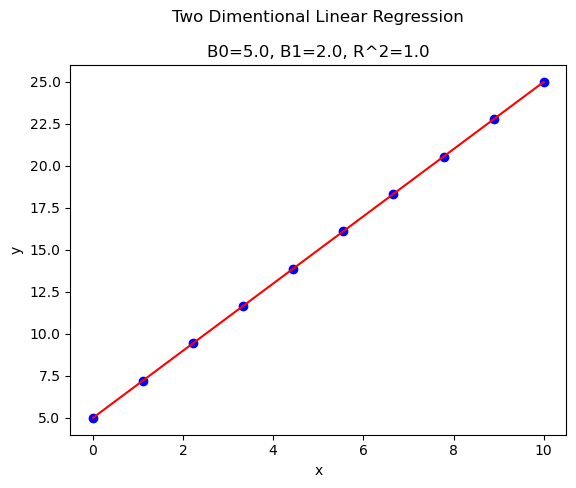

In [21]:
x = np.linspace(0, 10, 10)
y = 2 * x + 5

ypred, B = multLinReg(x, y)

plt.scatter(x, y, color='blue')
plt.plot(x, ypred, color='red')
plt.title('Two Dimentional Linear Regression\n\n'
            'B0=' + str(round(B[0][0],1)) + ', B1=' + str(round(B[1][0],1)) + ', R^2=' + str(rsquared(y, ypred)))
plt.xlabel('x')
plt.ylabel('y')


[[5.]
 [2.]
 [3.]]


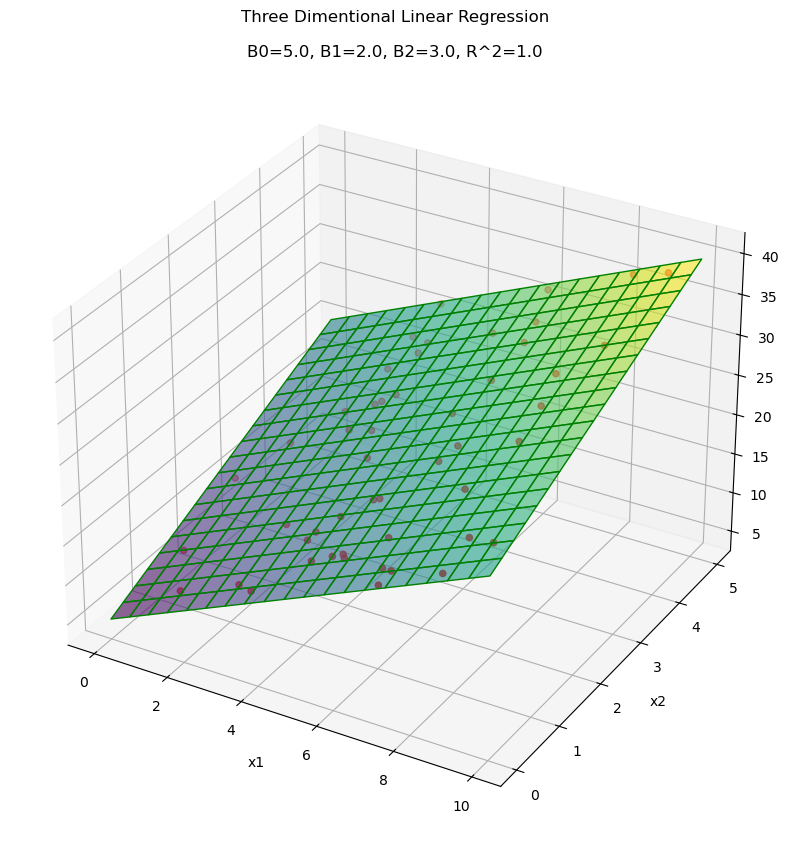

In [67]:
x1 = np.random.uniform(0, 10, 50)
x2 = np.random.uniform(0, 5, 50)

#print(x1.shape)
#print(x2.shape)
x = np.column_stack((x1, x2))
y = 2 * x1 + 3 * x2 + 5

#print(x)
#print(x.reshape(-1,1).shape)
#print(y.shape)
ypred, B = multLinReg(x, y)

X1Mesh, X2Mesh = np.meshgrid(np.linspace(0, 10, 20), np.linspace(0, 5, 20))
YSurf = B[0] + B[1] * X1Mesh + B[2] * X2Mesh

fig = plt.figure(figsize = (10,10))

ax = plt.axes(projection='3d')
ax.set_title('Three Dimentional Linear Regression\n\n'
                'B0=' + str(round(B[0][0],1)) + ', B1=' + str(round(B[1][0],1)) 
                + ', B2=' + str(round(B[2][0],1)) + ', R^2=' + str(rsquared(y, ypred)))
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')


ax.plot_surface(X1Mesh, X2Mesh, YSurf, cmap='viridis', edgecolor='green', alpha=0.6)
ax.scatter(x1, x2, y, c='red')

print(B)



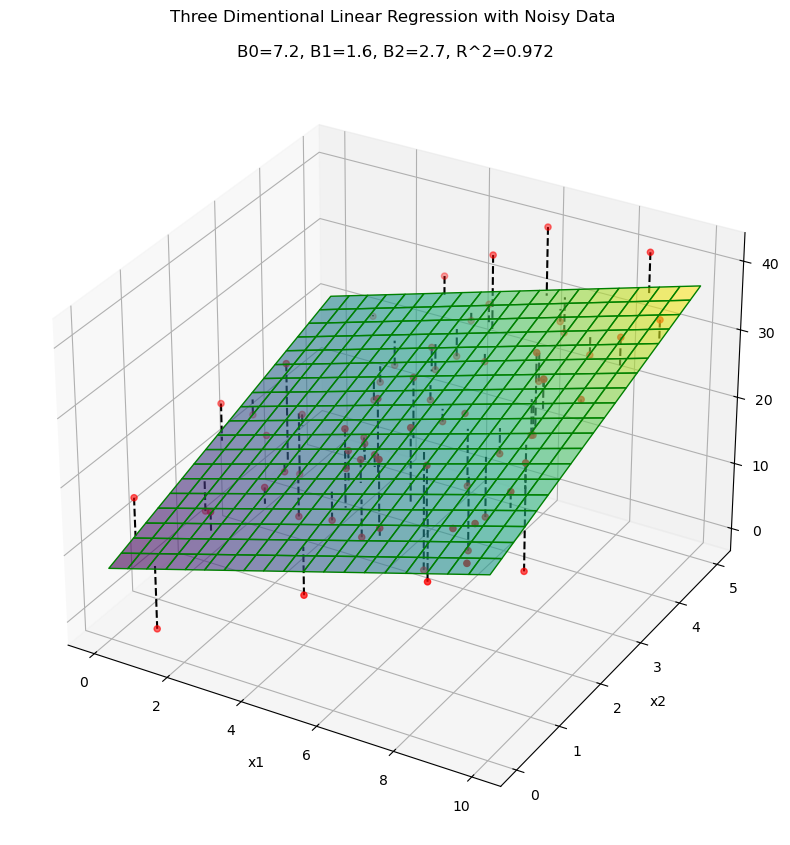

In [68]:


x1 = np.random.uniform(0, 10, 70)
x2 = np.random.uniform(0, 5, 70)

x = np.column_stack((x1, x2))
y = 2 * x1 + 3 * x2 + 5

# Adding Gaussian noise
noise = np.random.normal(0, 6, size=y.shape)
y_noisy = y + noise

ypred, B = multLinReg(x, y_noisy)

X1Mesh, X2Mesh = np.meshgrid(np.linspace(0, 10, 20), np.linspace(0, 5, 20))
YSurf = B[0] + B[1] * X1Mesh + B[2] * X2Mesh

fig = plt.figure(figsize = (10,10))

ax = plt.axes(projection='3d')
ax.set_title('Three Dimentional Linear Regression with Noisy Data \n\n'
                'B0=' + str(round(B[0][0],1)) + ', B1=' + str(round(B[1][0],1)) 
                + ', B2=' + str(round(B[2][0],1)) + ', R^2=' + str(round(rsquared(y, ypred), 3)))
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')


ax.plot_surface(X1Mesh, X2Mesh, YSurf, cmap='viridis', edgecolor='green', alpha=0.6)
ax.scatter(x1, x2, y_noisy, c='red')

for i in range(len(y)):
    ax.plot(
        [x1[i], x1[i]]
        ,[x2[i], x2[i]]
        ,[y_noisy[i], ypred[i,0]]
        ,color="black", linestyle="--")



Performing a polynomial regression is similar:

For $n$ observations and order $k$, given observations $y_i$ and predictors $x_i$,

$$y_i = \sum_{j=0}^k\beta_jx_{i}^j+\epsilon_i = \beta_0 + \beta_1x_{i}^1 + \beta_2x_{i}^2 + ... + \beta_kx_{i}^k + \epsilon_i$$

where $i=1;...,n$; $j=1,...,k$; $\beta_0$ is the intercept; $\beta_j$ is the coefficient of the $j-th$ order independant term; and $\epsilon_i$ is the error for the $i-th$ observation. 

Thus, for a predicted value $\hat{y}_i$:

$$\hat{y}_i = \sum_{j=0}^k\beta_jx_{i}^j = \beta_0 + \beta_1x_{i}^1 + \beta_2x_{i}^2 + ... + \beta_kx_{i}^k$$

Let:



$$ \mathbf{y} = \begin{bmatrix} 
y_1 \\
y_2 \\
\vdots \\
y_n \\
\end{bmatrix} ;\quad
\mathbf{\hat{y}} = \begin{bmatrix} 
\hat{y}_1 \\
\hat{y}_2 \\
\vdots \\
\hat{y}_n \\
\end{bmatrix} ;\quad
\mathbf{X} = \begin{bmatrix}
    1 & x_{1} & x_{1}^2 & \dots  & x_{1}^k \\
    1 & x_{2} & x_{2}^2 & \dots  & x_{2}^k \\
    1 & \vdots & \vdots & \ddots & \vdots \\
    1 & x_{n} & x_{n}^2 & \dots  & x_{n}^k
\end{bmatrix}; \quad
\boldsymbol{\beta} = \begin{bmatrix} 
\beta_1 \\
\beta_2 \\
\vdots \\
\beta_n \\
\end{bmatrix} ; \quad
\boldsymbol{\epsilon} = \begin{bmatrix} 
\epsilon_1 \\
\epsilon_2 \\
\vdots \\
\epsilon_n \\
\end{bmatrix} $$

and thus:

$$
\mathbf{y} = \mathbf{X} \cdot \boldsymbol{\beta} + \boldsymbol{\epsilon}
$$

and 

$$ 
\mathbf{\hat{y}} = \mathbf{X} \cdot \boldsymbol{\beta}
$$
    

Solving for $\boldsymbol{\beta}$ once again works out to:

$$\boldsymbol{\beta} = (\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{y}$$

In [70]:
# Defining Regression Function that will take in numpy arrays

def polyReg(x, y, degree):
    
    if x.ndim == 1:
        x = x.reshape(-1, 1)
        
    y = y.reshape(-1, 1)

    # Transforming x into polynomial features
    xPoly = np.hstack([x**(d+1) for d in range(degree)])
    
    # Adding a column of 1s to our predictor matrix
    X = np.hstack((np.ones((xPoly.shape[0], 1)), xPoly))

    # Solving for parameters
    B = np.linalg.pinv(X) @ y
    
    # Solving for predicted y values
    ypred = X @ B

    return ypred, B

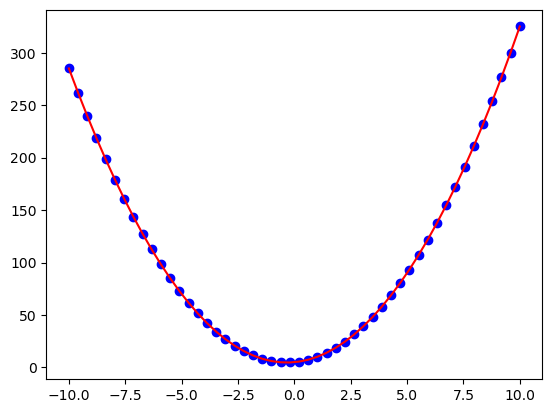

In [71]:
x = np.linspace(-10, 10, 50)

y = 2 * x + 3 * x ** 2 + 5

ypred, B = polyReg(x, y, 2)

plt.scatter(x, y, color='blue')
plt.plot(x, ypred, color='red')

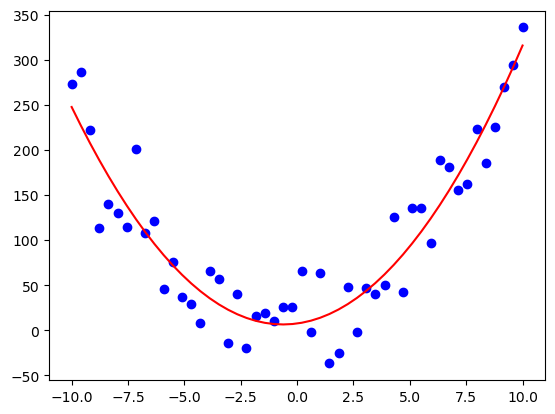

In [72]:
x = np.linspace(-10, 10, 50)

y = 2 * x + 3 * x ** 2 + 5

# Adding Gaussian noise
noise = np.random.normal(0, 30, size=y.shape)
y_noisy = y + noise

ypred, B = polyReg(x, y_noisy, 2)

plt.scatter(x, y_noisy, color='blue')
plt.plot(x, ypred, color='red')

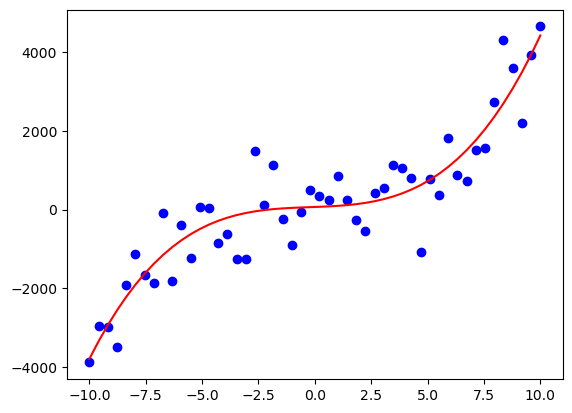

In [87]:
x = np.linspace(-10, 10, 50)

y = 2 * x + 3 * x ** 2 + 4 * x ** 3 + 5

# Adding Gaussian noise
noise = np.random.normal(0, 600, size=y.shape)
y_noisy = y + noise

ypred, B = polyReg(x, y_noisy, 3)

plt.scatter(x, y_noisy, color='blue')
plt.plot(x, ypred, color='red')

Now let's combine multiple and polynomial regression to set

Take two predictors $x_1$ and $x_2$, and degree 2:

$$y_i = \beta_0 + \beta_1x_{1i} + \beta_2x_{2i} + \beta_3x_{1i}^2 + \beta_4x_{1i}x_{2i} + \beta_5x_{2i}^2 + \epsilon_i$$

In [209]:
from itertools import combinations_with_replacement

# Defining function that will take a list of predictor variables and a desired degree
# This will arrange our predictor matrix X to be later passed on into a regression function

def arangePoly(xlist, degree):

    X = []
    
    for d in range(degree):
        # xPoly = np.hstack([xlist[i]**(d+1) for d in range(degree)])
        combList = list(combinations_with_replacement(xlist, d+1))

        for comb in combList:
            
            addList = np.ones(len(xlist[0]))
            
            for item in comb:
 
                addList = addList * item

            # print(addList)
            X.append(addList)

    # print('XXXXX')
    # print(X)
    return np.array(X).T



# And now including this matrix setup with similar our previously created 

def multPolyReg(x, y, degree):

    x = arangePoly(x, degree)
    
    if x.ndim == 1:
        x = x.reshape(-1, 1)
        
    y = y.reshape(-1, 1)

    # Transforming x into polynomial features
    # xPoly = np.hstack([x**(d+1) for d in range(degree)])
    
    # Adding a column of 1s to our predictor matrix
    X = np.hstack((np.ones((x.shape[0], 1)), x))

    # Solving for parameters
    #print(y.size)
    B = np.linalg.pinv(X) @ y
    
    # Solving for predicted y values
    ypred = X @ B

    return ypred, B

In [210]:
from itertools import combinations_with_replacement

x = np.array([1,2])

combList = list(combinations_with_replacement(x, 3))

for comb in combList:
    print(str(comb), ':::' ,(comb[0] * comb[1]))

(1, 1, 1) ::: 1
(1, 1, 2) ::: 1
(1, 2, 2) ::: 2
(2, 2, 2) ::: 4


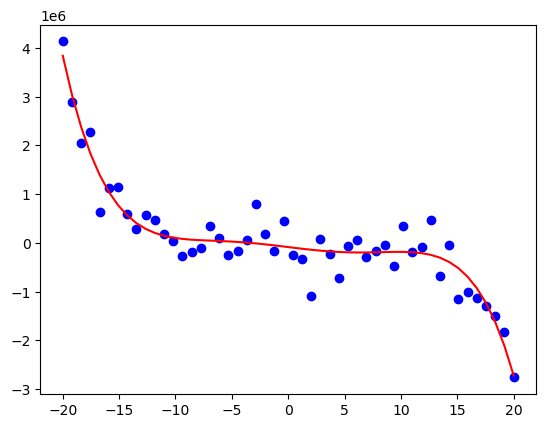

In [211]:
x = np.linspace(-20, 20, 50)

y = -x ** 5 + 3 * x ** 4 + 2 * x + 3 * x ** 2 + 4 * x ** 3 + 5

xlist = np.array([x])

# Adding Gaussian noise
noise = np.random.normal(0, 300000, size=y.shape)
y_noisy = y + noise

ypred, B = multPolyReg(xlist, y_noisy, 5)

plt.scatter(x, y_noisy, color='blue')
plt.plot(x, ypred, color='red')

[[ 5.]
 [ 2.]
 [ 3.]
 [-3.]
 [ 1.]
 [ 8.]]


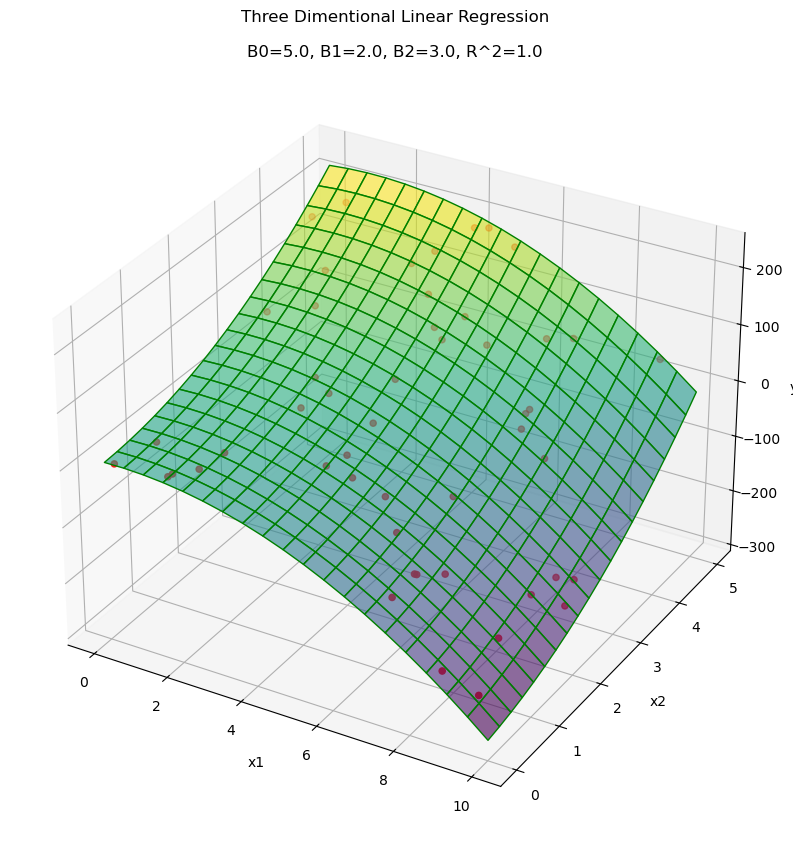

In [212]:
x1 = np.random.uniform(0, 10, 50)
x2 = np.random.uniform(0, 5, 50)

#print(x1.shape)
#print(x2.shape)
#x = np.column_stack((x1, x2))
x = [x1, x2]
y = -3 * x1 ** 2 + x1 * x2 + 8 * x2 ** 2 + 2 * x1 + 3 * x2 + 5

#print(x)
#print(x.reshape(-1,1).shape)
#print(y.shape)
ypred, B = multPolyReg(x, y, 2)

X1Mesh, X2Mesh = np.meshgrid(np.linspace(0, 10, 20), np.linspace(0, 5, 20))
YSurf = B[0] + (B[1] * X1Mesh) + (B[2] * X2Mesh) + (B[3] * X1Mesh ** 2) + (B[4] * X1Mesh * X2Mesh) + (B[5] * X2Mesh ** 2)

fig = plt.figure(figsize = (10,10))

ax = plt.axes(projection='3d')
ax.set_title('Three Dimentional Linear Regression\n\n'
                'B0=' + str(round(B[0][0],1)) + ', B1=' + str(round(B[1][0],1)) 
                + ', B2=' + str(round(B[2][0],1)) + ', R^2=' + str(rsquared(y, ypred)))
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')


ax.plot_surface(X1Mesh, X2Mesh, YSurf, cmap='viridis', edgecolor='green', alpha=0.6)
ax.scatter(x1, x2, y, c='red')

print(B)



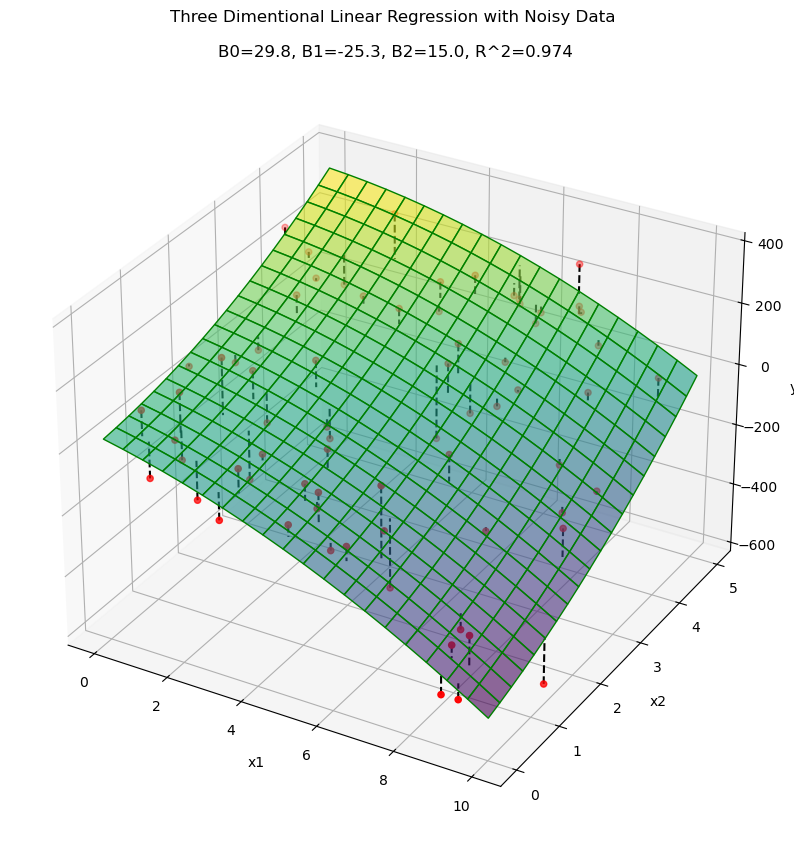

In [216]:


x1 = np.random.uniform(0, 10, 70)
x2 = np.random.uniform(0, 5, 70)

x = [x1, x2]
y = -5 * x1 ** 2 + 3 * x1 * x2 + 10 * x2 ** 2 + 2 * x1 + 3 * x2 + 5

# Adding Gaussian noise
noise = np.random.normal(0, 100, size=y.shape)
y_noisy = y + noise

ypred, B = multPolyReg(x, y_noisy, 2)

X1Mesh, X2Mesh = np.meshgrid(np.linspace(0, 10, 20), np.linspace(0, 5, 20))
YSurf = B[0] + (B[1] * X1Mesh) + (B[2] * X2Mesh) + (B[3] * X1Mesh ** 2) + (B[4] * X1Mesh * X2Mesh) + (B[5] * X2Mesh ** 2)

fig = plt.figure(figsize = (10,10))

ax = plt.axes(projection='3d')
ax.set_title('Three Dimentional Linear Regression with Noisy Data \n\n'
                'B0=' + str(round(B[0][0],1)) + ', B1=' + str(round(B[1][0],1)) 
                + ', B2=' + str(round(B[2][0],1)) + ', R^2=' + str(round(rsquared(y, ypred), 3)))
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')


ax.plot_surface(X1Mesh, X2Mesh, YSurf, cmap='viridis', edgecolor='green', alpha=0.6)
ax.scatter(x1, x2, y_noisy, c='red')

for i in range(len(y)):
    ax.plot(
        [x1[i], x1[i]]
        ,[x2[i], x2[i]]
        ,[y_noisy[i], ypred[i,0]]
        ,color="black", linestyle="--")

